# Pymaceuticals Inc.
---
*Capomulin drug regimen decreased  tumor volume in mouse J119 by 6.875 mm3 in 45 days.
*Capomulin, Ramicane, Infubinol, Ceftamin all decreased tumor volume at a similar rate over 45 days, but Capomulin and Ramicane tumor sizes started and decreased at about the same sizes. 
*Variance for Capomulin treated tumor size was lower than all other drug regimens except for Ramicane.
*There is a moderate correlation between weight and tumor size. As weight increases, it appears tumor sizes are higher as well.
 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete= pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID"])

# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [4]:
# Checking the number of mice.
mice_ID_list= mouse_study_complete["Mouse ID"].unique()
mice_count=len(mice_ID_list)
mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates= mouse_study_complete[mouse_study_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_point_to_drop= "g989"
mouse_study_complete_clean= mouse_study_complete[mouse_study_complete["Mouse ID"] != data_point_to_drop]
mouse_study_complete_clean

#mouse_study_complete= mouse_study_complete.loc[~mouse_study_complete["Mouse ID"].duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_ID_list_clean= mouse_study_complete_clean["Mouse ID"].unique()
mice_count_clean=len(mice_ID_list_clean)
mice_count_clean

248

## Summary Statistics

In [9]:
#calculate mean for tumor volume
mean_tumor_volume= mouse_study_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#calculate median tumor volume
median_tumor_volume= mouse_study_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#calculate variance of tumor volume
variance_tumor_volume= mouse_study_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance_tumor_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#calculate SD of tumor volume
SD_tumor_volume= mouse_study_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SD_tumor_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#claculate SEM of tumor volume
SEM_tumor_volume= mouse_study_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
SEM_tumor_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Assemble the resulting series into a single summary DataFrame.

tumor_summary= pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, "Tumor Volume Variance": variance_tumor_volume, 
                             "Tumor Volume Std Dev": SD_tumor_volume, "Tumor Volume Std Err": SEM_tumor_volume})

tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#summary_stats_tumor= mouse_study_complete_clean.groupby("Drug Regimen").agg(
    #Mean_Value=("Tumor Volume (mm3)", "mean"), 
    #Median_Value=("Tumor Volume (mm3)", "median"), 
    #Tumor_Variance= ("Tumor Volume (mm3)", "var"), 
    #STD_tumor= ("Tumor Volume (mm3)", "std"), 
    #SEM_tumor= ("Tumor Volume (mm3)", "sem"))

summary_stats_tumor= mouse_study_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_value= "mean", 
    Median_value= "median", 
    Tumor_variance= "var", 
    STD_tumor= "std", 
    SEM_tumor= "sem").reset_index()
summary_stats_tumor

,Drug Regimen,Mean_value,Median_value,Tumor_variance,STD_tumor,SEM_tumor
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
#calculate number of different mice IDs per drug
total_rows_per_drug= mouse_study_complete_clean["Drug Regimen"].value_counts()
total_rows_per_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [17]:
unique_drug_list= mouse_study_complete_clean["Drug Regimen"].unique().tolist()
unique_drug_list

['Capomulin',
 'Ketapril',
 'Naftisol',
 'Infubinol',
 'Stelasyn',
 'Ramicane',
 'Zoniferol',
 'Propriva',
 'Placebo',
 'Ceftamin']

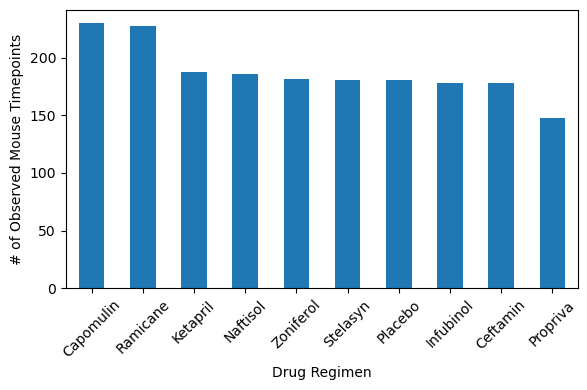

In [18]:
#create bar graph using pandas with mice per drug data

ax= total_rows_per_drug.plot(kind="bar", figsize= (6, 4))

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
ax.set_xticklabels(total_rows_per_drug.index, rotation=45)

plt.tight_layout()
plt.show()

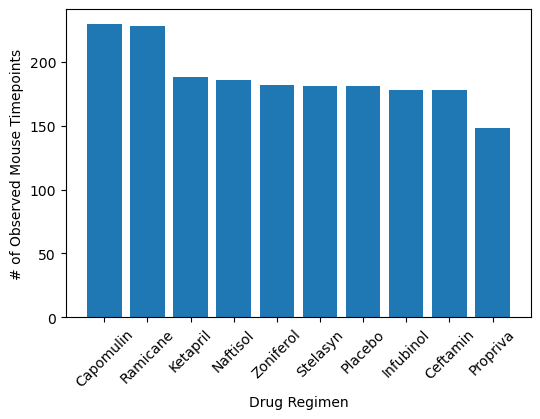

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#create x axis list of data
x_axis= ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]

#create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(x_axis, total_rows_per_drug)

#customize 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation= 45)
plt.tight_layout

plt.show()

In [20]:
#count number of male and female mice
male_vs_female= mouse_study_complete_clean["Sex"].value_counts()
male_vs_female

Male      958
Female    922
Name: Sex, dtype: int64

In [26]:
mf_data= {"Category": ["Male", "Female"], 
       "Value": [958, 922]}
male_vs_female_df= pd.DataFrame(mf_data)
male_vs_female_df

,Category,Value
0,Male,958
1,Female,922


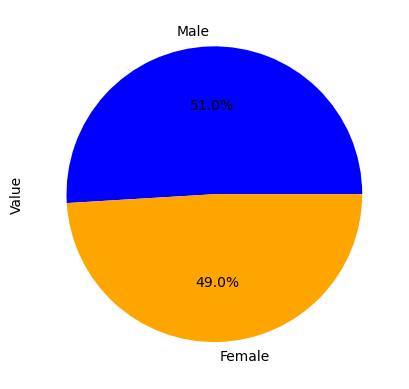

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#plt.figure(figsize=(5,5))
#plt.pie(male_vs_female, labels=male_vs_female.index, autopct="%1.1f%%", startangle=0, colors=["blue", "orange"])
#plt.show()

male_vs_female_df.plot(kind="pie", y="Value", labels=male_vs_female_df["Category"], autopct="%1.1f%%", startangle= 0, legend=False, colors=["blue", "orange"])

plt.show()

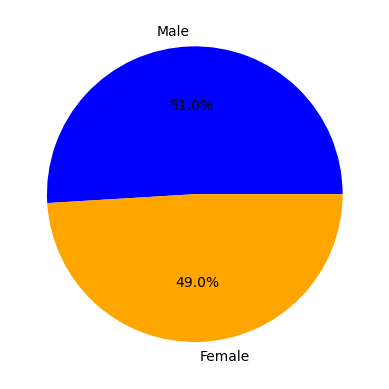

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ["Male", "Female"]
sizes= [958, 922]
colors= ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
new_df_timepoint_ID_tumor= mouse_study_complete_clean[["Drug Regimen", "Tumor Volume (mm3)", "Mouse ID", "Timepoint"]]

new_df_timepoint_ID_tumor

,Drug Regimen,Tumor Volume (mm3),Mouse ID,Timepoint
0,Capomulin,45.000000,b128,0
1,Ketapril,45.000000,f932,0
2,Ketapril,45.000000,g107,0
3,Ketapril,45.000000,a457,0
4,Ketapril,45.000000,c819,0
...,...,...,...,...
1888,Capomulin,41.581521,r944,45
1889,Capomulin,31.023923,u364,45
1890,Ceftamin,61.433892,p438,45
1891,Placebo,58.634971,x773,45


In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
extracted_last_timepoint= new_df_timepoint_ID_tumor[new_df_timepoint_ID_tumor["Timepoint"]==45]

extracted_last_timepoint


,Drug Regimen,Tumor Volume (mm3),Mouse ID,Timepoint
1763,Ramicane,31.095335,n364,45
1764,Capomulin,38.982878,b128,45
1765,Ceftamin,59.851956,l661,45
1766,Ceftamin,64.729837,y865,45
1767,Ceftamin,68.594745,y769,45
...,...,...,...,...
1888,Capomulin,41.581521,r944,45
1889,Capomulin,31.023923,u364,45
1890,Ceftamin,61.433892,p438,45
1891,Placebo,58.634971,x773,45


In [31]:
drug_names= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

final_tumor_volume= extracted_last_timepoint[extracted_last_timepoint["Drug Regimen"].isin(drug_names)]
final_tumor_volume


,Drug Regimen,Tumor Volume (mm3),Mouse ID,Timepoint
1763,Ramicane,31.095335,n364,45
1764,Capomulin,38.982878,b128,45
1765,Ceftamin,59.851956,l661,45
1766,Ceftamin,64.729837,y865,45
1767,Ceftamin,68.594745,y769,45
...,...,...,...,...
1879,Ramicane,32.978522,a644,45
1885,Ramicane,33.562402,i177,45
1888,Capomulin,41.581521,r944,45
1889,Capomulin,31.023923,u364,45


In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#organize above dataframe by treatment regimen

final_drug_tumor_volumes= final_tumor_volume.sort_values(by="Drug Regimen", ascending=True)
final_drug_tumor_volumes

,Drug Regimen,Tumor Volume (mm3),Mouse ID,Timepoint
1838,Capomulin,36.041047,w914,45
1821,Capomulin,40.658124,v923,45
1878,Capomulin,47.685963,i557,45
1788,Capomulin,32.377357,r554,45
1829,Capomulin,38.939633,b742,45
...,...,...,...,...
1780,Ramicane,36.374510,i334,45
1776,Ramicane,45.220869,q597,45
1773,Ramicane,38.407618,a411,45
1857,Ramicane,38.810366,a520,45


In [33]:
final_drug_tumor_volumes=final_drug_tumor_volumes.reset_index(drop=True)
final_drug_tumor_volumes

,Drug Regimen,Tumor Volume (mm3),Mouse ID,Timepoint
0,Capomulin,36.041047,w914,45
1,Capomulin,40.658124,v923,45
2,Capomulin,47.685963,i557,45
3,Capomulin,32.377357,r554,45
4,Capomulin,38.939633,b742,45
...,...,...,...,...
58,Ramicane,36.374510,i334,45
59,Ramicane,45.220869,q597,45
60,Ramicane,38.407618,a411,45
61,Ramicane,38.810366,a520,45


In [34]:
drug_tumor_only=final_drug_tumor_volumes[["Drug Regimen", "Tumor Volume (mm3)"]]
drug_tumor_only

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,36.041047
1,Capomulin,40.658124
2,Capomulin,47.685963
3,Capomulin,32.377357
4,Capomulin,38.939633
...,...,...
58,Ramicane,36.374510
59,Ramicane,45.220869
60,Ramicane,38.407618
61,Ramicane,38.810366


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
specific_treatments=final_drug_tumor_volumes["Drug Regimen"].unique().tolist()
specific_treatments

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [36]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data_list=list()

In [37]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. (each drug individually)
#IQR for Capomulin
drug_1= "Capomulin"
drug_volume_data1= final_drug_tumor_volumes[final_drug_tumor_volumes["Drug Regimen"]==drug_1]["Tumor Volume (mm3)"]

Q1= drug_volume_data1.quantile(0.25)
Q3= drug_volume_data1.quantile(0.75)

IQR= Q3-Q1

#solve for potential outliers
multiplier= 1.5

lower_bound= Q1-multiplier * IQR
upper_bound= Q3+multiplier *IQR

print(f"IQR for {drug_1}: {IQR}")
print(f"Q3: {Q3}")
print(f"Q1: {Q1}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(drug_volume_data1)

IQR for Capomulin: 7.781863460000004
Q3: 40.1592203
Q1: 32.37735684
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
0     36.041047
1     40.658124
2     47.685963
3     32.377357
4     38.939633
5     31.896238
6     38.125164
7     33.329098
8     28.430964
9     40.159220
10    37.074024
11    41.581521
12    28.484033
13    41.483008
14    34.455298
15    23.343598
16    37.311846
17    40.728578
18    38.982878
19    31.023923
20    38.846876
Name: Tumor Volume (mm3), dtype: float64


In [38]:
#IQR for Ceftamin
drug_2= "Ceftamin"
drug_volume_data2= final_drug_tumor_volumes[final_drug_tumor_volumes["Drug Regimen"]==drug_2]["Tumor Volume (mm3)"]

Q1= drug_volume_data2.quantile(0.25)
Q3= drug_volume_data2.quantile(0.75)

IQR= Q3-Q1

multiplier= 1.5

lower_bound= Q1-multiplier * IQR
upper_bound= Q3+multiplier *IQR

print(f"IQR for {drug_2}: {IQR}")
print(f"Q3: {Q3}")
print(f"Q1: {Q1}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(drug_volume_data2)

IQR for Ceftamin: 6.093590140000003
Q3: 67.52748237
Q1: 61.43389223
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.
21    61.433892
22    61.386660
23    68.923185
24    64.299830
25    67.748662
26    62.999356
27    59.851956
28    64.729837
29    59.741901
30    64.634949
31    68.594745
32    67.527482
33    61.849023
Name: Tumor Volume (mm3), dtype: float64


In [39]:
#IQR for Infubinol
drug_3= "Infubinol"
drug_volume_data3= final_drug_tumor_volumes[final_drug_tumor_volumes["Drug Regimen"]==drug_3]["Tumor Volume (mm3)"]

Q1= drug_volume_data3.quantile(0.25)
Q3= drug_volume_data3.quantile(0.75)

IQR= Q3-Q1

multiplier= 1.5

lower_bound= Q1-multiplier * IQR
upper_bound= Q3+multiplier *IQR


print(f"IQR for {drug_3}: {IQR}")
print(f"Q3: {Q3}")
print(f"Q1: {Q1}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(drug_volume_data3)

IQR for Infubinol: 4.9311172099999965
Q3: 67.68556862
Q1: 62.75445141
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.
34    67.973419
35    67.685569
36    72.226731
37    62.754451
38    65.525743
39    66.196912
40    66.083066
41    60.918767
42    62.435404
Name: Tumor Volume (mm3), dtype: float64


In [40]:
#IQR for Ramicane
drug_4= "Ramicane"
drug_volume_data4= final_drug_tumor_volumes[final_drug_tumor_volumes["Drug Regimen"]==drug_4]["Tumor Volume (mm3)"]

Q1= drug_volume_data4.quantile(0.25)
Q3= drug_volume_data4.quantile(0.75)

IQR= Q3-Q1

multiplier= 1.5

lower_bound= Q1-multiplier * IQR
upper_bound= Q3+multiplier *IQR

print(f"IQR for {drug_4}: {IQR}")
print(f"Q3: {Q3}")
print(f"Q1: {Q1}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(drug_volume_data4)

IQR for Ramicane: 7.527130082500001
Q3: 38.5083053075
Q1: 30.981175225
Values below 19.69048010125 could be outliers.
Values above 49.79900043125001 could be outliers.
43    32.978522
44    33.562402
45    40.667713
46    29.128472
47    37.225650
48    31.095335
49    37.311236
50    43.047543
51    31.560470
52    36.134852
53    33.397653
54    30.564625
55    40.659006
56    30.638696
57    30.276232
58    36.374510
59    45.220869
60    38.407618
61    38.810366
62    22.050126
Name: Tumor Volume (mm3), dtype: float64


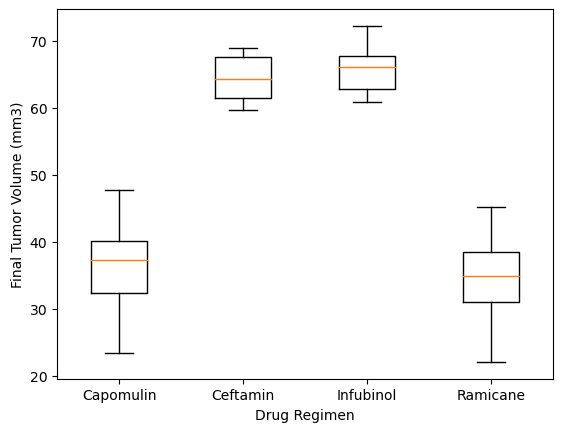

In [41]:
labels= ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

data= [drug_volume_data1, drug_volume_data2, drug_volume_data3, drug_volume_data4]

plt.boxplot(data, labels=labels)

plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

In [42]:
#extract mouse ID I509 data only 
mouse_j119= mouse_study_complete_clean[mouse_study_complete_clean["Mouse ID"]== "j119"]
mouse_j119

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
235,j119,Capomulin,Female,7,23,0,45.000000,0
354,j119,Capomulin,Female,7,23,5,45.838998,0
570,j119,Capomulin,Female,7,23,10,46.425366,0
818,j119,Capomulin,Female,7,23,15,47.322984,0
1009,j119,Capomulin,Female,7,23,20,48.158209,1
1136,j119,Capomulin,Female,7,23,25,42.417166,1
1441,j119,Capomulin,Female,7,23,30,43.013681,1
1599,j119,Capomulin,Female,7,23,35,43.765705,1
1673,j119,Capomulin,Female,7,23,40,44.585090,1
1859,j119,Capomulin,Female,7,23,45,38.125164,1


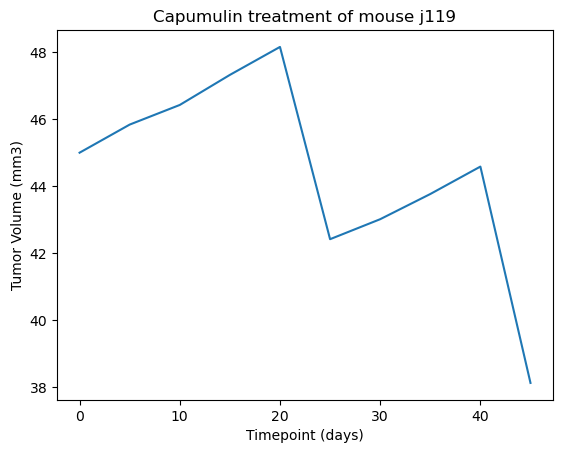

In [43]:
#extract data from above dataframe
plt.plot(mouse_j119["Timepoint"], mouse_j119["Tumor Volume (mm3)"])

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capumulin treatment of mouse j119")

custom_xticks= [0, 10, 20, 30, 40]
plt.xticks(custom_xticks)

plt.show()

In [44]:
#extract mouse weight and tumor volume 
mouse_weight_and_tumor= mouse_study_complete_clean[["Tumor Volume (mm3)", "Weight (g)", "Drug Regimen"]]
mouse_weight_and_tumor

,Tumor Volume (mm3),Weight (g),Drug Regimen
0,45.000000,22,Capomulin
1,45.000000,29,Ketapril
2,45.000000,29,Ketapril
3,45.000000,30,Ketapril
4,45.000000,25,Ketapril
...,...,...,...
1888,41.581521,25,Capomulin
1889,31.023923,17,Capomulin
1890,61.433892,26,Ceftamin
1891,58.634971,30,Placebo


In [45]:
#extract Capomulin regimen data only
Capomulin_weight_tumor_only= mouse_weight_and_tumor[mouse_weight_and_tumor["Drug Regimen"]== "Capomulin"]
Capomulin_weight_tumor_only

,Tumor Volume (mm3),Weight (g),Drug Regimen
0,45.000000,22,Capomulin
226,45.000000,21,Capomulin
227,45.000000,17,Capomulin
228,45.000000,17,Capomulin
229,45.000000,21,Capomulin
...,...,...,...
1854,40.728578,23,Capomulin
1859,38.125164,23,Capomulin
1878,47.685963,24,Capomulin
1888,41.581521,25,Capomulin


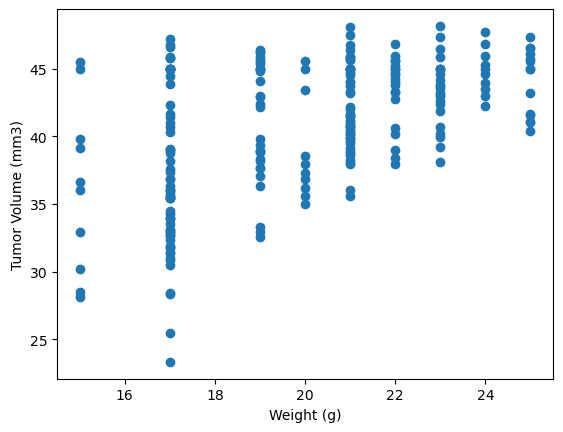

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(Capomulin_weight_tumor_only["Weight (g)"], Capomulin_weight_tumor_only["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [48]:
# Calculate the correlation coefficient
correlation= Capomulin_weight_tumor_only["Weight (g)"].corr(Capomulin_weight_tumor_only["Tumor Volume (mm3)"])
print("correlation coefficient:", correlation)

correlation coefficient: 0.5256995552077169


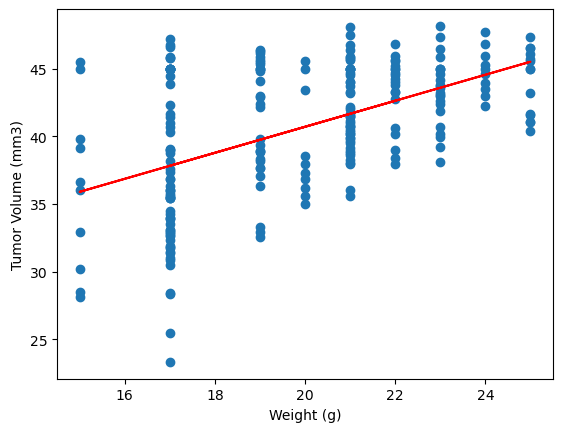

In [52]:
#a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
#extract variables from dataframe
X= Capomulin_weight_tumor_only[["Weight (g)"]]
y= Capomulin_weight_tumor_only["Tumor Volume (mm3)"]

model= LinearRegression()
model.fit(X, y)

y_pred= model.predict(X)

plt.scatter(Capomulin_weight_tumor_only["Weight (g)"], Capomulin_weight_tumor_only["Tumor Volume (mm3)"])
plt.plot(X, y_pred, color="red", label="Linear Regression")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()